In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [12]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\DS Intern\task 5\BigML_Dataset_5fde1fade84f94757d00135a.csv")

In [14]:
df.head()

,State,Atmospheric Condition,Crash Date,Fatalities in crash,Roadway,Age,Alcohol Results,Person Type,Drug Involvement,Race,Gender,Injury Severity,Crash Date.year,Crash Date.month,Crash Date.day-of-month,Crash Date.day-of-week
0,Alaska,Clear,2011-01-05,1,Rural-Principal Arterial-Interstate,27.0,0.0,Driver of a Motor Vehicle In-Transport,Yes,NaN,Male,Non-incapacitating Evident Injury (B),2011,1,5,3
1,Alaska,Clear,2011-01-05,1,Rural-Principal Arterial-Interstate,60.0,0.0,Driver of a Motor Vehicle In-Transport,No,White,Female,Fatal Injury (K),2011,1,5,3
2,Arizona,Clear,2011-01-01,1,Urban-Other Principal Arterial,24.0,NaN,Passenger of a Motor Vehicle In-Transport,Not Reported,NaN,Female,No Injury (O),2011,1,1,6
3,Arizona,Clear,2011-01-01,1,Urban-Other Principal Arterial,27.0,0.0,Driver of a Motor Vehicle In-Transport,No,NaN,Male,No Injury (O),2011,1,1,6
4,Arizona,Clear,2011-01-01,1,Urban-Other Principal Arterial,82.0,0.0,Pedestrian,No,Unknown,Female,Fatal Injury (K),2011,1,1,6


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    4999 non-null   object 
 1   Atmospheric Condition    4999 non-null   object 
 2   Crash Date               4999 non-null   object 
 3   Fatalities in crash      4999 non-null   int64  
 4   Roadway                  4999 non-null   object 
 5   Age                      4929 non-null   float64
 6   Alcohol Results          2293 non-null   float64
 7   Person Type              4999 non-null   object 
 8   Drug Involvement         4999 non-null   object 
 9   Race                     2320 non-null   object 
 10  Gender                   4999 non-null   object 
 11  Injury Severity          4999 non-null   object 
 12  Crash Date.year          4999 non-null   int64  
 13  Crash Date.month         4999 non-null   int64  
 14  Crash Date.day-of-month 

In [20]:
df.isnull().sum()/len(df)*100

State                       0.000000
Atmospheric Condition       0.000000
Crash Date                  0.000000
Fatalities in crash         0.000000
Roadway                     0.000000
Age                         1.400280
Alcohol Results            54.130826
Person Type                 0.000000
Drug Involvement            0.000000
Race                       53.590718
Gender                      0.000000
Injury Severity             0.000000
Crash Date.year             0.000000
Crash Date.month            0.000000
Crash Date.day-of-month     0.000000
Crash Date.day-of-week      0.000000
dtype: float64

In [23]:
#drop any rows with missing values
df = df.replace('unknown', pd.NA)

df = df.dropna()   

In [25]:
df.isnull().sum()/len(df)*100

State                      0.0
Atmospheric Condition      0.0
Crash Date                 0.0
Fatalities in crash        0.0
Roadway                    0.0
Age                        0.0
Alcohol Results            0.0
Person Type                0.0
Drug Involvement           0.0
Race                       0.0
Gender                     0.0
Injury Severity            0.0
Crash Date.year            0.0
Crash Date.month           0.0
Crash Date.day-of-month    0.0
Crash Date.day-of-week     0.0
dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1665 entries, 1 to 4998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    1665 non-null   object 
 1   Atmospheric Condition    1665 non-null   object 
 2   Crash Date               1665 non-null   object 
 3   Fatalities in crash      1665 non-null   int64  
 4   Roadway                  1665 non-null   object 
 5   Age                      1665 non-null   float64
 6   Alcohol Results          1665 non-null   float64
 7   Person Type              1665 non-null   object 
 8   Drug Involvement         1665 non-null   object 
 9   Race                     1665 non-null   object 
 10  Gender                   1665 non-null   object 
 11  Injury Severity          1665 non-null   object 
 12  Crash Date.year          1665 non-null   int64  
 13  Crash Date.month         1665 non-null   int64  
 14  Crash Date.day-of-month  1665

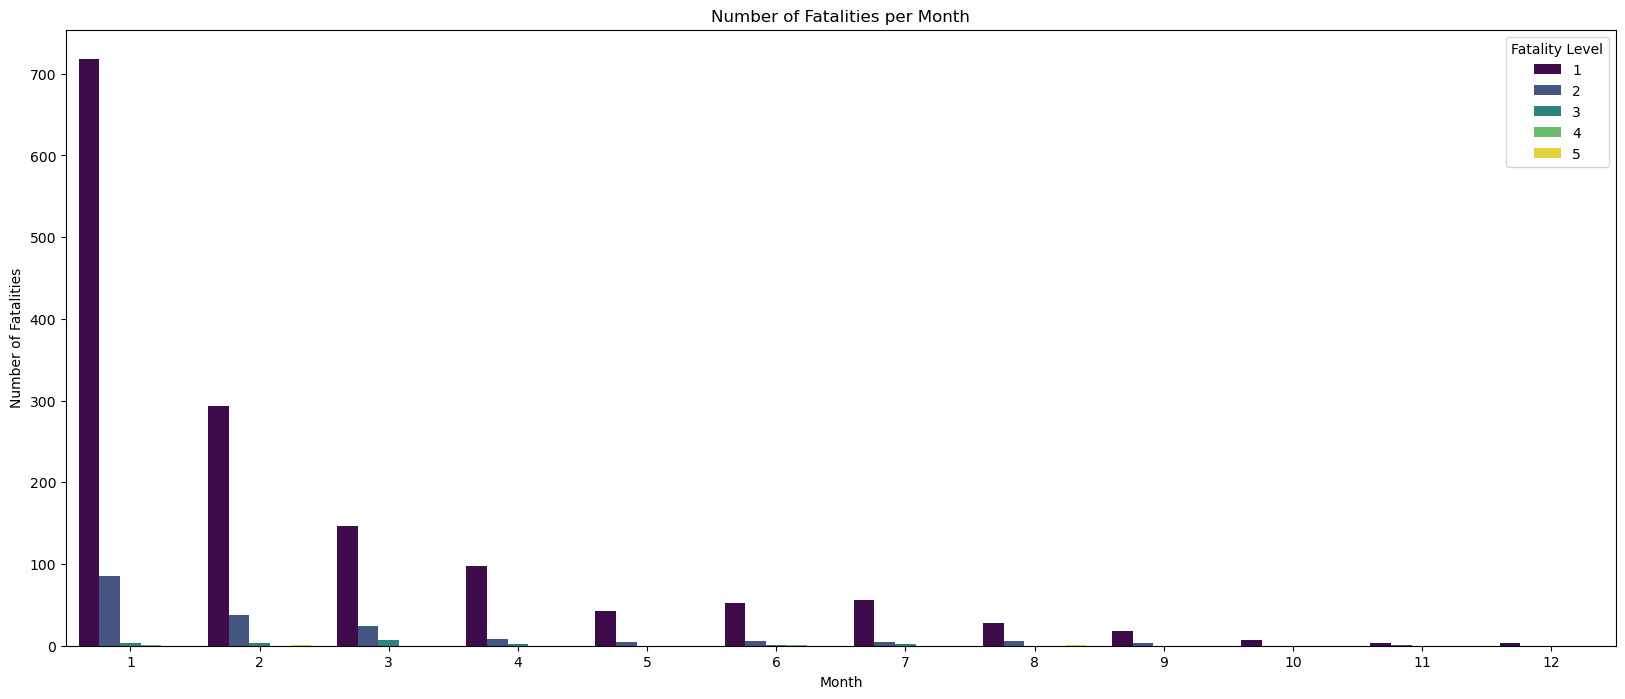

In [75]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='Crash Date.month', hue='Fatalities in crash', palette='viridis')
plt.title('Number of Fatalities per Month')
plt.xlabel('Month')
plt.ylabel('Number of Fatalities')
plt.legend(title='Fatality Level')
plt.show()

In [56]:
#create age groups for better visualization
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

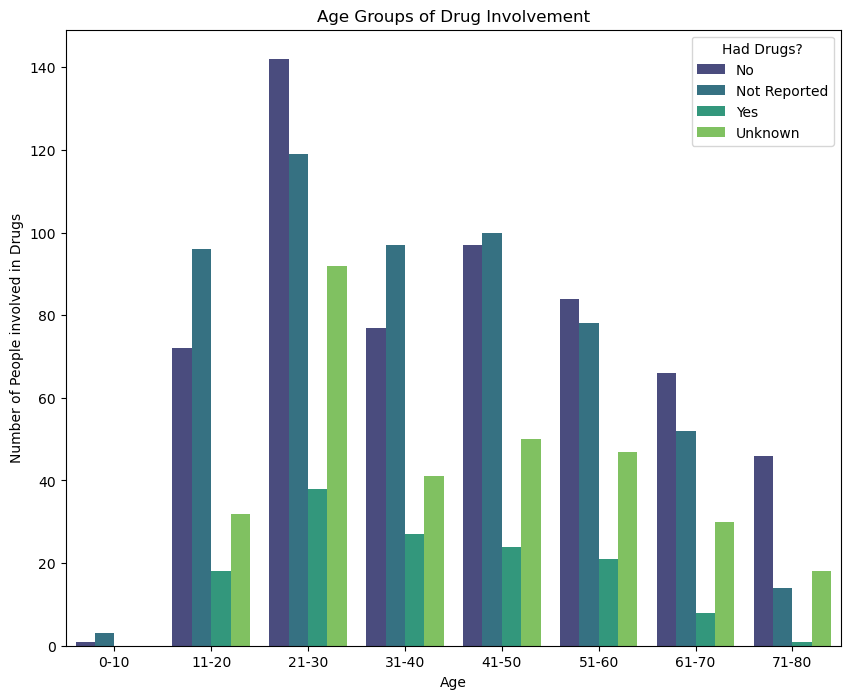

In [77]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='AgeGroup', hue='Drug Involvement', palette='viridis')
plt.title('Age Groups of Drug Involvement')
plt.xlabel('Age')
plt.ylabel('Number of People involved in Drugs')
plt.legend(title='Had Drugs?')
plt.show()

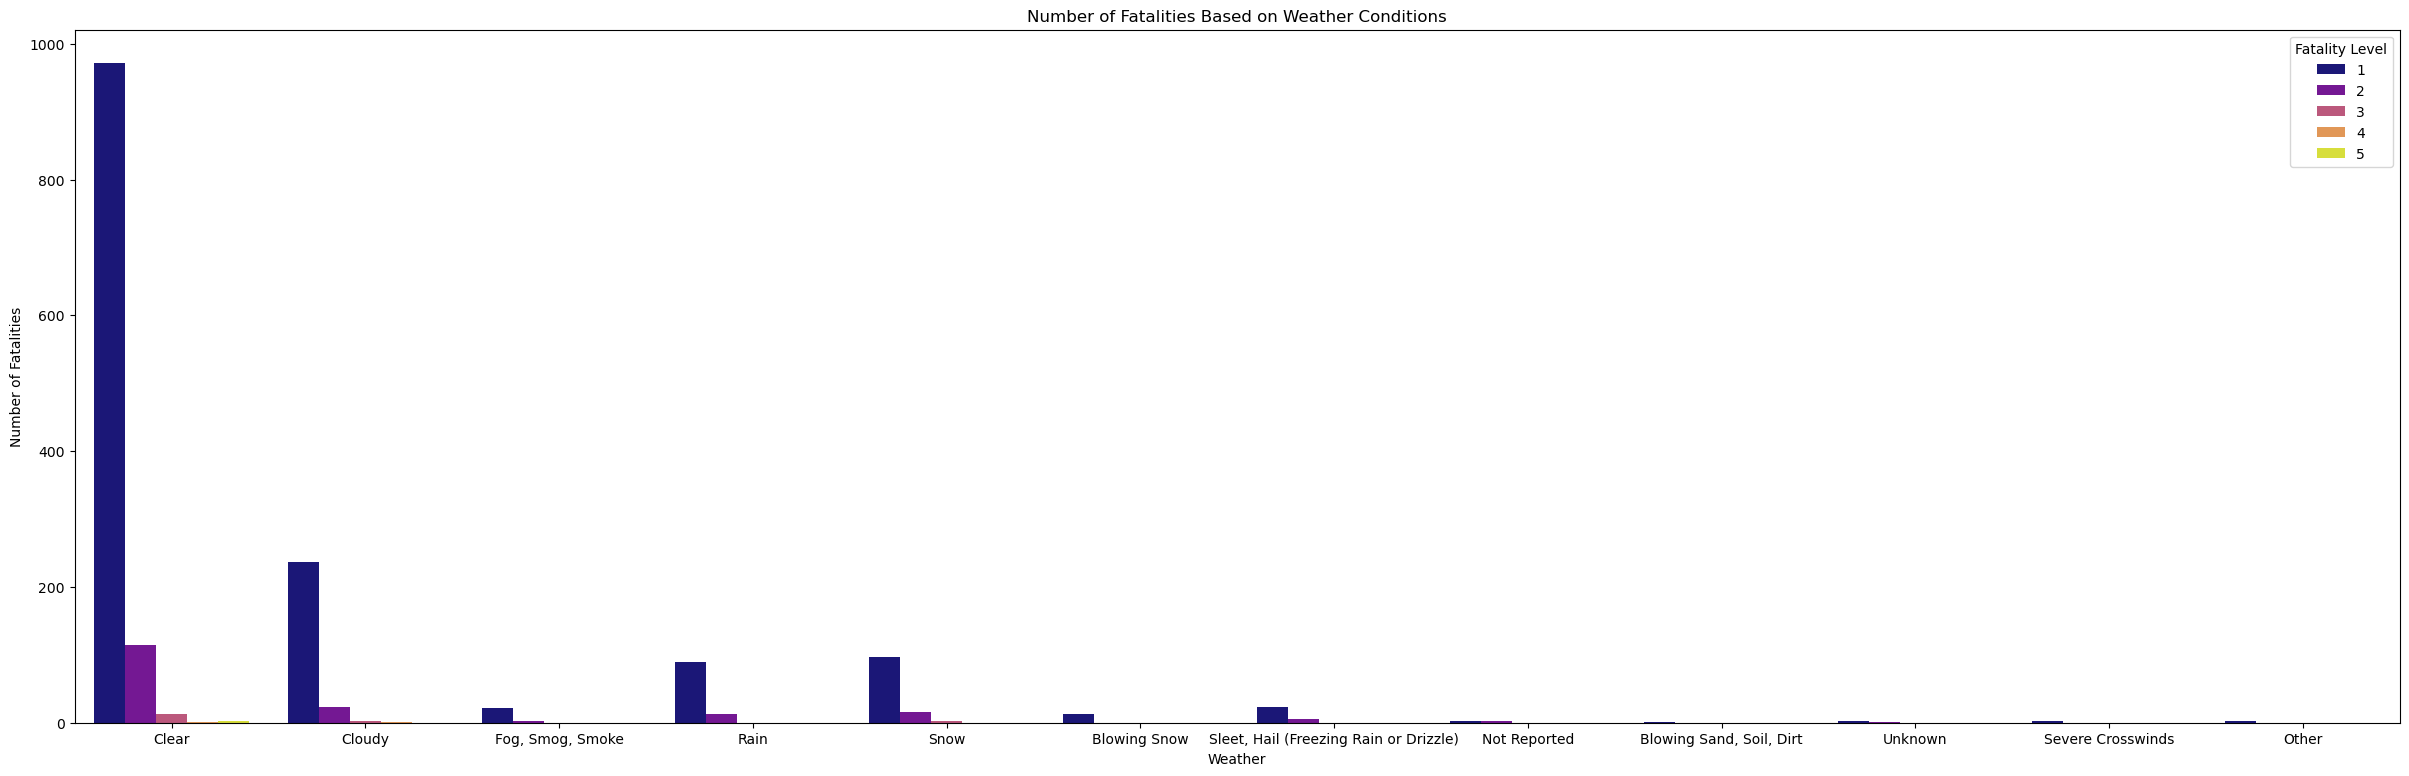

In [87]:
plt.figure(figsize=(30, 9))
sns.countplot(data=df, x='Atmospheric Condition', hue='Fatalities in crash', palette='plasma')
plt.title('Number of Fatalities Based on Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Number of Fatalities')
plt.legend(title='Fatality Level')
plt.show()

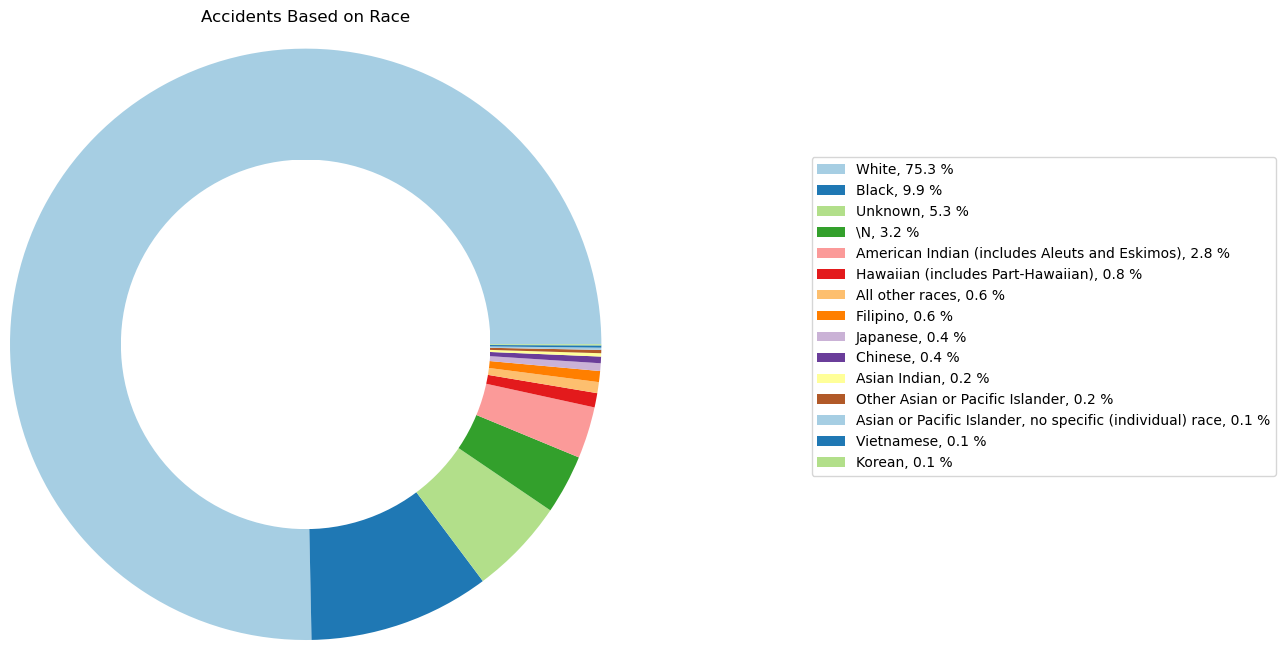

In [246]:
# Calculate percentage of accidents based on race
percentages = df['Race'].value_counts(normalize=True) * 100
df_race = df['Race'].unique()
df_val = df.value_counts('Race')
percents = df_val.to_numpy() * 100 / df_val.to_numpy().sum()

fig, ax = plt.subplots()
ax.pie(
    percentages,
    radius=2,
    colors=plt.cm.Paired.colors,
)

# Draw circle to create a donut chart
centre_circle = plt.Circle(xy=(0, 0), radius=1.25, facecolor='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding legend with percentages
plt.legend(labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df_val.index, percents)], bbox_to_anchor=(1.85, 1.025), loc="upper left")
plt.title('Accidents Based on Race', x=0.5, y=1.35)
plt.show()


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1665 entries, 1 to 4998
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   State                    1665 non-null   object  
 1   Atmospheric Condition    1665 non-null   object  
 2   Crash Date               1665 non-null   object  
 3   Fatalities in crash      1665 non-null   int64   
 4   Roadway                  1665 non-null   object  
 5   Age                      1665 non-null   float64 
 6   Alcohol Results          1665 non-null   float64 
 7   Person Type              1665 non-null   object  
 8   Drug Involvement         1665 non-null   object  
 9   Race                     1665 non-null   object  
 10  Gender                   1665 non-null   object  
 11  Injury Severity          1665 non-null   object  
 12  Crash Date.year          1665 non-null   int64   
 13  Crash Date.month         1665 non-null   int64   
 14  Crash Date.da

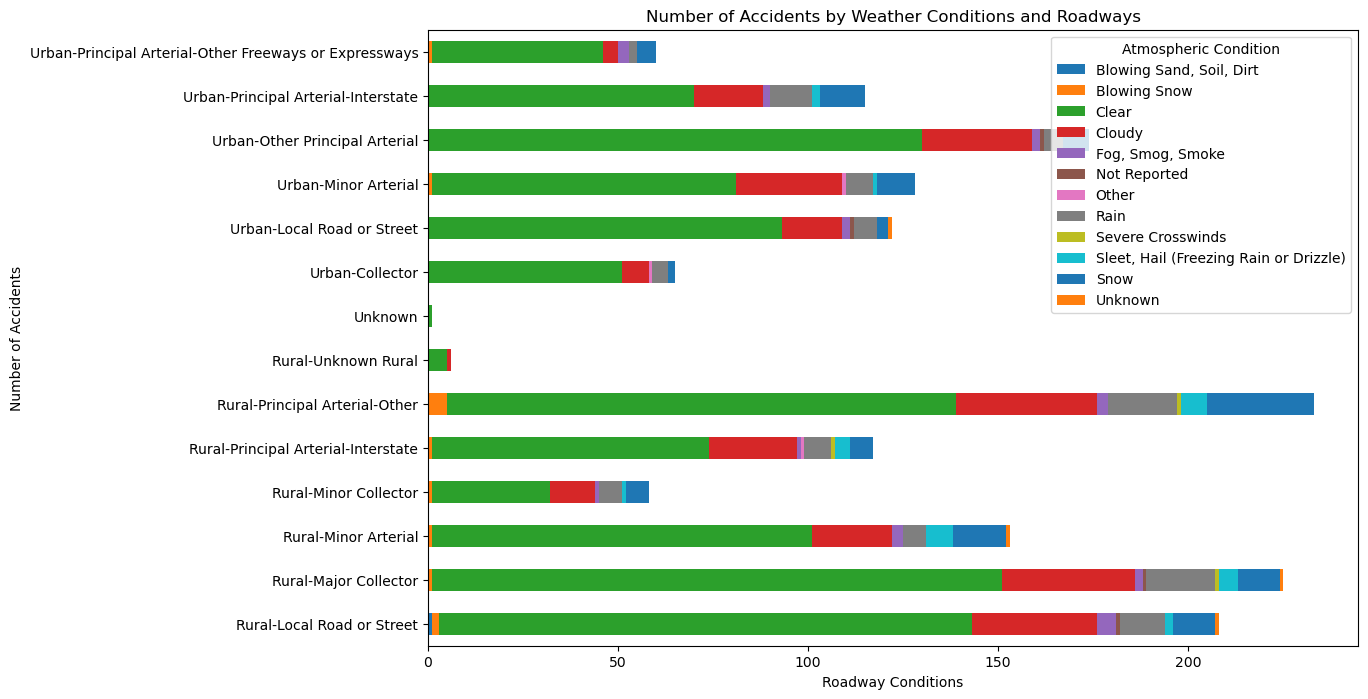

In [286]:
df_grouped = df.groupby(['Roadway', 'Atmospheric Condition']).size().unstack()
df_grouped.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Number of Accidents by Weather Conditions and Roadways')
plt.xlabel('Roadway Conditions')
plt.ylabel('Number of Accidents')
plt.show()

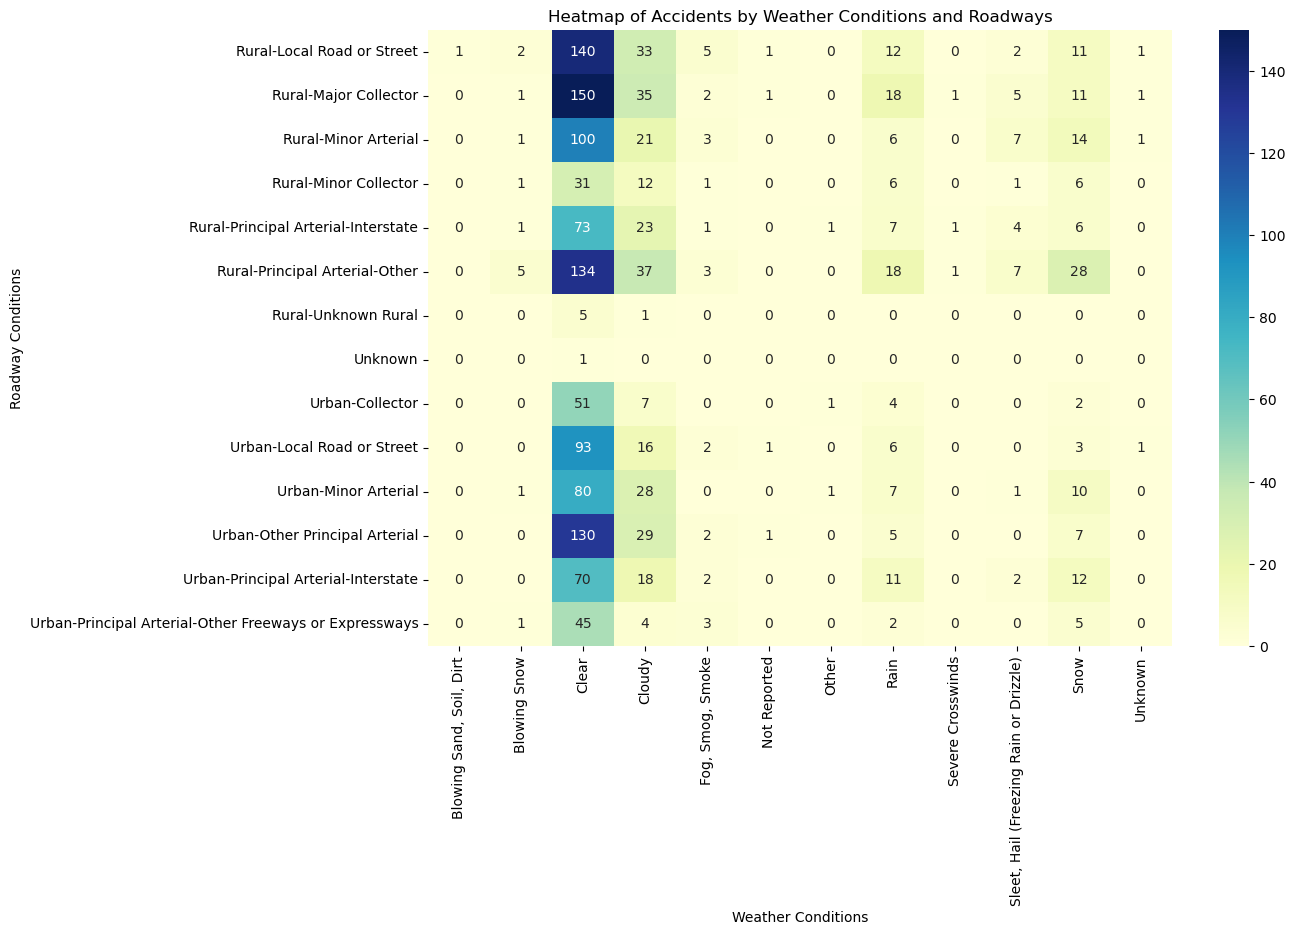

In [288]:
df_pivot = df.pivot_table(index='Roadway', columns='Atmospheric Condition', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Accidents by Weather Conditions and Roadways')
plt.xlabel('Weather Conditions')
plt.ylabel('Roadway Conditions')
plt.show()